# JWST DM Decay

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from collections import Counter

import numpy as np 
import scipy.optimize as opt
from astroquery.mast import Observations as obv 
import astropy.table as table
import astropy.io as io 

import DMdecayJWST as assume
import JWSTparsedatafiles as JWSTparse 
# import MWDMhalo as mw

In [3]:
obv_list = obv.query_criteria(
        obs_collection="JWST", 
        instrument_name="NIRSPEC/IFU",
        dataRights="PUBLIC",
        target_name="GNZ11")

In [4]:
obv_list

intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,objID
str7,str4,str7,str11,str4,str12,str8,str5,str30,str38,float64,float64,str8,str17,int64,float64,float64,float64,float64,float64,str87,float64,str4,str2,int64,str157,str64,str65,str6,bool,float64,str9,str9
science,JWST,APT,NIRSPEC/IFU,JWST,F170LP;G235M,INFRARED,GNZ11,--,jw04426002001_xx101_00001_nirspec,189.1060420833333,62.242041666666665,spectrum,"Maiolino, Roberto",-1,nan,nan,3793.111,1660.0,5000.0,An unprecedented spatially resolved analysis of the brightest galaxy at z>10 in GOODS-N,nan,4426,DD,1,POLYGON 189.1059016311109 62.24141959718841 189.10499169561078 62.24220101937843 189.1066047212209 62.242620221637694 189.10751485237097 62.24183900368527,--,--,PUBLIC,False,nan,150338330,271555709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
science,JWST,CALJWST,NIRSPEC/IFU,JWST,F170LP;G235M,Infrared,GNZ11,Galaxy; High-redshift galaxies,jw04426-o001_t001_nirspec_g235m-f170lp,189.1060420833333,62.24204166666667,cube,"Maiolino, Roberto",3,60087.18656565764,60087.64128767361,37931.10999999999,1660.0,5000.0,An unprecedented spatially resolved analysis of the brightest galaxy at z>10 in GOODS-N,60088.57688648,4426,DD,--,POLYGON 189.104665497 62.241490133 189.104665497 62.242601244 189.107409106 62.242601244 189.107409106 62.241490133,mast:JWST/product/jw04426-o001_t001_nirspec_g235m-f170lp_s3d.jpg,mast:JWST/product/jw04426-o001_t001_nirspec_g235m-f170lp_s3d.fits,PUBLIC,False,nan,139257240,301207806
science,JWST,CALJWST,NIRSPEC/IFU,JWST,F100LP;G140M,Infrared,GNZ11,Galaxy; High-redshift galaxies,jw04426-o001_t001_nirspec_g140m-f100lp,189.1060420833333,62.24204166666667,cube,"Maiolino, Roberto",3,60087.64415798507,60087.79055493056,11671.110000000002,700.0,5000.0,An unprecedented spatially resolved analysis of the brightest galaxy at z>10 in GOODS-N,60088.57688648,4426,DD,--,POLYGON 189.104657711 62.241488368 189.104657711 62.242599479 189.107401321 62.242599479 189.107401321 62.241488368,mast:JWST/product/jw04426-o001_t001_nirspec_g140m-f100lp_s3d.jpg,mast:JWST/product/jw04426-o001_t001_nirspec_g140m-f100lp_s3d.fits,PUBLIC,False,nan,139257277,301207821


In [4]:
obv_list[-1]["data"]

In [5]:
pl

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level
str9,str4,str8,str39,str64,str1,str68,str9,str28,str8,str1,str7,str6,str4,str50,int64,str9,str6,int64
128929396,JWST,spectrum,jw01345-o062_s00162_nirspec_clear-prism,source/target (L3) : association generator,D,mast:JWST/product/jw01345-o062_20230831t181155_spec3_00001_asn.json,INFO,Minimum Recommended Products,ASN,--,CALJWST,1.11.4,1345,jw01345-o062_20230831t181155_spec3_00001_asn.json,4962,128929396,PUBLIC,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106599050,JWST,spectrum,jw01345062001_03101_00003_nrs2,exposure/target (L2b/L3): 2D image of spectrum avg integrations,S,mast:JWST/product/jw01345062001_03101_00003_nrs2_s2d.fits,SCIENCE,--,S2D,--,CALJWST,1.8.2,1345,jw01345062001_03101_00003_nrs2_s2d.fits,41774400,128929396,PUBLIC,2
106599050,JWST,spectrum,jw01345062001_03101_00003_nrs2,exposure/target (L2b/L3): 1D extracted spectrum,S,mast:JWST/product/jw01345062001_03101_00003_nrs2_x1d.fits,SCIENCE,--,X1D,--,CALJWST,1.8.2,1345,jw01345062001_03101_00003_nrs2_x1d.fits,12003840,128929396,PUBLIC,2


In [17]:
calibed = pl[(pl["calib_level"] == 3)]

In [40]:
calibed

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level
str9,str4,str8,str39,str64,str1,str68,str9,str28,str8,str1,str7,str6,str4,str50,int64,str9,str6,int64
128929396,JWST,spectrum,jw01345-o062_s00162_nirspec_clear-prism,source/target (L3) : association generator,D,mast:JWST/product/jw01345-o062_20230831t181155_spec3_00001_asn.json,INFO,Minimum Recommended Products,ASN,--,CALJWST,1.11.4,1345,jw01345-o062_20230831t181155_spec3_00001_asn.json,4962,128929396,PUBLIC,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128929396,JWST,spectrum,jw01345-o062_s00162_nirspec_clear-prism,exposure/target (L2b/L3): 2D image of spectrum avg integrations,D,mast:JWST/product/jw01345-o062_s00162_nirspec_clear-prism_s2d.fits,SCIENCE,Minimum Recommended Products,S2D,--,CALJWST,1.11.4,1345,jw01345-o062_s00162_nirspec_clear-prism_s2d.fits,336960,128929396,PUBLIC,3
128929396,JWST,spectrum,jw01345-o062_s00162_nirspec_clear-prism,exposure/target (L2b/L3): 1D extracted spectrum,D,mast:JWST/product/jw01345-o062_s00162_nirspec_clear-prism_x1d.fits,SCIENCE,Minimum Recommended Products,X1D,--,CALJWST,1.11.4,1345,jw01345-o062_s00162_nirspec_clear-prism_x1d.fits,123840,128929396,PUBLIC,3


In [7]:
dwn = obv.download_products(pl[(pl["calib_level"] == 3)])

INFO: Found cached file ./mastDownload/JWST/jw01345-o062_s00162_nirspec_clear-prism/jw01345-o062_20230831t181155_spec3_00001_asn.json with expected size 4962. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01345-o062_s00162_nirspec_clear-prism/jw01345-o062_s00162_nirspec_clear-prism_cal.fits with expected size 432000. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01345-o062_s00162_nirspec_clear-prism/jw01345-o062_s00162_nirspec_clear-prism_cal.jpg with expected size 1842. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01345-o062_s00162_nirspec_clear-prism/jw01345-o062_s00162_nirspec_clear-prism_s2d.fits with expected size 336960. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01345-o062_s00162_nirspec_clear-prism/jw01345-o062_s00162_nirspec_clear-prism_s2d.jpg with expected size 1547. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01345-o062_s00162_nirspec_clear-prism/jw01345-o062_s00162_nirspec_

In [42]:
f1d = calibed[calibed["productSubGroupDescription"] == "X1D"]["productFilename"][0]
d1d = calibed[calibed["productSubGroupDescription"] == "X1D"]["obs_id"][0]

In [43]:
p1d = "mastDownload/JWST/{}/{}".format(d1d, f1d)

In [45]:
hdulist = io.fits.open(p1d)

In [54]:
hdulist[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  140 / length of dimension 1                          
NAXIS2  =                  419 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   18 / number of table fields                         
EXTNAME = 'EXTRACT1D'          / extension name                                 
EXTVER  =                    1 / extension value                                
TTYPE1  = 'WAVELENGTH'                                                          
TFORM1  = 'D       '                                                            
TUNIT1  = 'um      '        

In [55]:
lam = hdulist[1].data["WAVELENGTH"]
target = hdulist[1].data["SURF_BRIGHT"]
sky = hdulist[1].data["BACKGROUND"]

(-0.1, 0.25)

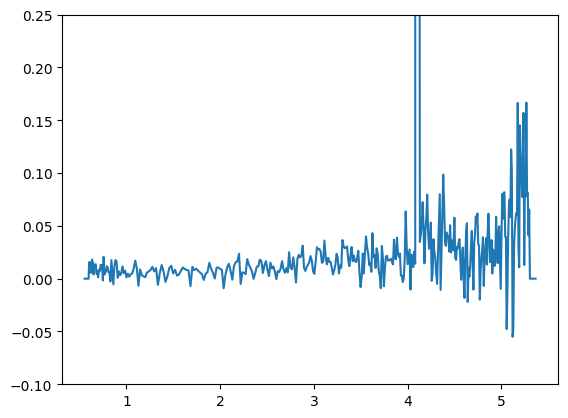

In [60]:
fig, ax = plt.subplots()

ax.plot(lam, target)
ax.set_ylim(-.1, .25)

(-0.1, 0.5)

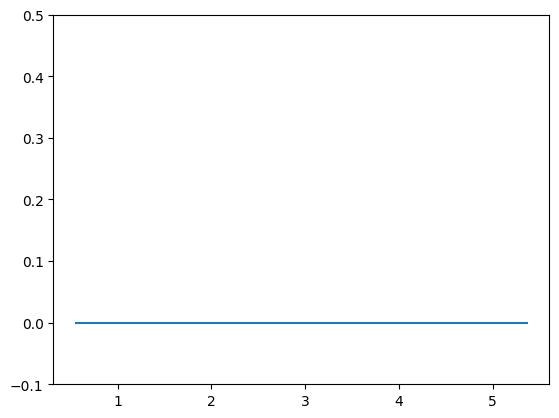

In [61]:
fig, ax = plt.subplots()

ax.plot(lam, sky)
ax.set_ylim(-.1, .5)

In [63]:
f2d = calibed[calibed["productSubGroupDescription"] == "S2D"]["productFilename"][0]
d2d = calibed[calibed["productSubGroupDescription"] == "S2D"]["obs_id"][0]

In [65]:
p2d = "mastDownload/JWST/{}/{}".format(d2d, f2d)
hdulist = io.fits.open(p2d)

In [66]:
len(hdulist)

10

In [88]:
hdulist[1].header["EXTNAME"]

'SCI'

(-0.5, 0.5)

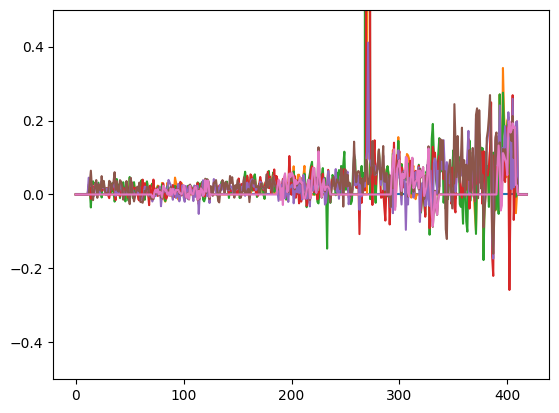

In [82]:
fig,ax = plt.subplots()
ax.plot(hdulist[1].data.T)
ax.set_ylim(-0.5,0.5)

(-0.5, 0.5)

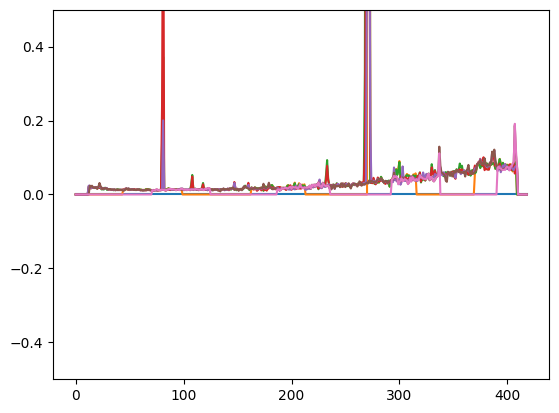

In [85]:
fig,ax = plt.subplots()
ax.plot(hdulist[2].data.T)
ax.set_ylim(-0.5,0.5)

In [97]:
hdulist[3].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  419                                                  
NAXIS2  =                    7                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'WHT     '           / extension name                                 
EXTVER  =                    1 / extension value                                

(-0.5, 0.5)

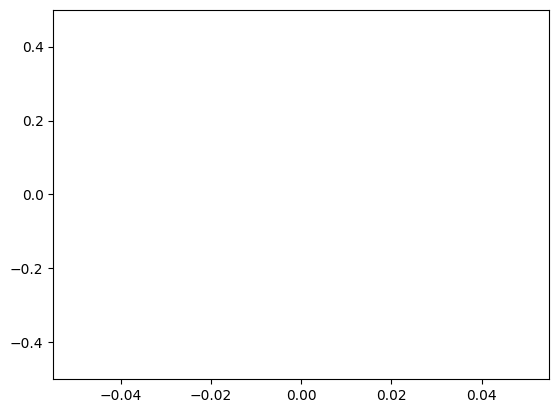

In [102]:
fig,ax = plt.subplots()
ax.plot(hdulist[7].data.T)
ax.set_ylim(-0.5,0.5)